# of data 683 
Batch size:  136


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


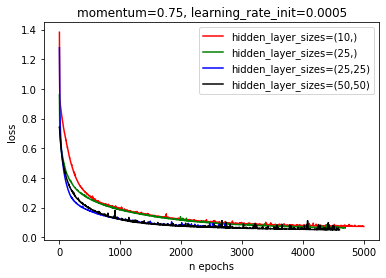

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


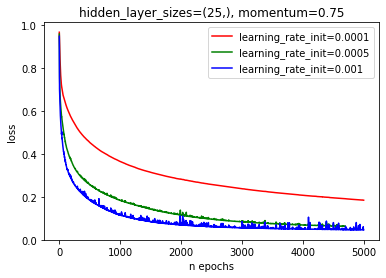

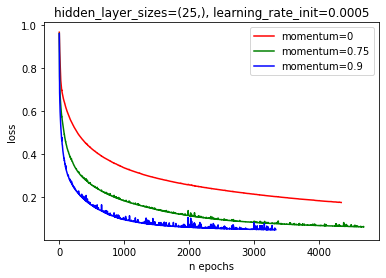

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# uncomment and run to upload breast-cancer-wisconsin.data to google colab if it is not included in the .ipynb file
from google.colab import files
#uploaded = files.upload()


def main():
  # Attribute Information: (class attribute has been moved to last column)

  #    #  Attribute                     Domain
  #    -- -----------------------------------------
  #    1. Sample code number            id number
  #    2. Clump Thickness               1 - 10
  #    3. Uniformity of Cell Size       1 - 10
  #    4. Uniformity of Cell Shape      1 - 10
  #    5. Marginal Adhesion             1 - 10
  #    6. Single Epithelial Cell Size   1 - 10
  #    7. Bare Nuclei                   1 - 10
  #    8. Bland Chromatin               1 - 10
  #    9. Normal Nucleoli               1 - 10
  #   10. Mitoses                       1 - 10
  #   11. Class:                        (2 for benign, 4 for malignant)

  names = ('Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class')

  data = pd.read_csv('breast-cancer-wisconsin.data', names=names)
  data = data.drop(['Sample code number'], axis=1) #remove 'code number' column
  data = data[data[names[6]]!='?'] #remove rows with missing data

  X = data.drop([names[-1]], axis=1)
  y = data[names[-1]]

  batch_size = int(len(X) / 5)
  epochs = 5000
  print('# of data', len(X), '\nBatch size: ', batch_size)

  #initalize all static parameters
  mlp = MLPClassifier(batch_size=batch_size, #should be 136
                      max_iter=epochs,
                      validation_fraction=0.2, #5-fold cross validation
                      n_iter_no_change=int(epochs / 5), #n_iter_no_change and tol are set the same to force .fit() to run practically every epoch
                      tol=0,
                      early_stopping=True,
                      shuffle=True,
                      activation='relu',
                      solver='sgd',
                      learning_rate='constant',
                      random_state=55)

  #hidden layers
  mlp.set_params(hidden_layer_sizes=(10,), momentum=0.75, learning_rate_init=0.0005)
  mlp.fit(X, y) 
  hidden_lc_1 = mlp.loss_curve_

  mlp.set_params(hidden_layer_sizes=(25,))
  mlp.fit(X, y) 
  hidden_lc_2 = mlp.loss_curve_

  mlp.set_params(hidden_layer_sizes=(25,25))
  mlp.fit(X, y) 
  hidden_lc_3 = mlp.loss_curve_

  mlp.set_params(hidden_layer_sizes=(50,50))
  mlp.fit(X, y) 
  hidden_lc_4 = mlp.loss_curve_

  hidden_layer_plot = plt.subplot(1,1,1)
  hidden_layer_plot.plot(hidden_lc_1, color='r', label='hidden_layer_sizes=(10,)')
  hidden_layer_plot.plot(hidden_lc_2, color='g', label='hidden_layer_sizes=(25,)')
  hidden_layer_plot.plot(hidden_lc_3, color='b', label='hidden_layer_sizes=(25,25)')
  hidden_layer_plot.plot(hidden_lc_4, color='k', label='hidden_layer_sizes=(50,50)')
  hidden_layer_plot.legend(loc='best')
  hidden_layer_plot.title.set_text('momentum=0.75, learning_rate_init=0.0005')
  hidden_layer_plot.set_xlabel('n epochs')
  hidden_layer_plot.set_ylabel('loss')
  plt.show()

  plt.clf()

  #eta
  mlp.set_params(hidden_layer_sizes=(25,), momentum=0.75, learning_rate_init=0.0001)
  mlp.fit(X, y) 
  eta_lc_1 = mlp.loss_curve_

  mlp.set_params(learning_rate_init=0.0005)
  mlp.fit(X, y) 
  eta_lc_2 = mlp.loss_curve_

  mlp.set_params(learning_rate_init=0.001)
  mlp.fit(X, y) 
  eta_lc_3 = mlp.loss_curve_

  eta_plot = plt.subplot(1,1,1)
  eta_plot.plot(eta_lc_1, color='r', label='learning_rate_init=0.0001')
  eta_plot.plot(eta_lc_2, color='g', label='learning_rate_init=0.0005')
  eta_plot.plot(eta_lc_3, color='b', label='learning_rate_init=0.001')
  eta_plot.legend(loc='best')
  eta_plot.title.set_text('hidden_layer_sizes=(25,), momentum=0.75')
  eta_plot.set_xlabel('n epochs')
  eta_plot.set_ylabel('loss')
  plt.show()

  plt.clf()

  #momentum
  mlp.set_params(hidden_layer_sizes=(25,), momentum=0.0, learning_rate_init=0.0005)
  mlp.fit(X, y) 
  momentum_lc_1 = mlp.loss_curve_

  mlp.set_params(momentum=0.75)
  mlp.fit(X, y) 
  momentum_lc_2 = mlp.loss_curve_

  mlp.set_params(momentum=0.9)
  mlp.fit(X, y) 
  momentum_lc_3 = mlp.loss_curve_

  momentum_plot = plt.subplot(1,1,1)
  momentum_plot.plot(momentum_lc_1, color='r', label='momentum=0')
  momentum_plot.plot(momentum_lc_2, color='g', label='momentum=0.75')
  momentum_plot.plot(momentum_lc_3, color='b', label='momentum=0.9')
  momentum_plot.legend(loc='best')
  momentum_plot.title.set_text('hidden_layer_sizes=(25,), learning_rate_init=0.0005')
  momentum_plot.set_xlabel('n epochs')
  momentum_plot.set_ylabel('loss')
  plt.show()
  plt.clf()


if __name__ == '__main__':
  main()

Report: Above are an assortment of graphs generated by experimenting with different parameters for the model. The first grpah varies hidden layer(s) shape, the second varies the learning rate, and the third varies momentum. 

Hidden Layers - The performance when changing the hidden layer architecture doesnt vary greatly but it is clear that a model with 2 hidden layers learns the data quicker and better than one with a single hidden layer. 

Learning rate - Choosing the right learning rate is key as this graph shows. Too low and the model won't reach above 80% accuracy while to high and the loss can be 'jumpy' between epochs. It appears that 0.0005 is a good middleground in this case.

Momentum - A model with zero momentum would eventually become as accurate as one without but it would be much more computationally expensive, although too much can cause overfitting. Here a momentum of 0.75 helps the model reach a high accuracy quicker, but without introducing much overfitting.

The green line on all of the graphs corresponds to model with a single 25 size hidden layer, 0.75 momentum, and 0.0005 learning rate which I have chosen as the best performing model. These parameters allow the model to reach over 95% accuracy without significant overfitting.